# Sit720 Distinction Task 9.1D

### Question 3

In [1]:
#load dataset4 in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Dataset4.csv')
df.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,target
0,38667.0,1883.0,tcp,mqtt,32.011598,9.0,5.0,3.0,3.0,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,51143.0,1883.0,tcp,mqtt,31.883584,9.0,5.0,3.0,3.0,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,44761.0,1883.0,tcp,mqtt,32.124053,9.0,5.0,3.0,3.0,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,60893.0,1883.0,tcp,mqtt,31.961063,9.0,5.0,3.0,3.0,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,51087.0,1883.0,tcp,mqtt,31.902362,9.0,5.0,3.0,3.0,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240.0,26847.0,502.0,MQTT_Publish


In [2]:
#get rid of NA values
df.dropna(inplace = True)

In [3]:
#check NAs are gone
df.isna().sum()

id.orig_p               0
id.resp_p               0
proto                   0
service                 0
flow_duration           0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
target                  0
Length: 84, dtype: int64

In [4]:
#use label encoding to change all categories to numbers for feature importances
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#create a copy df
df1 = df.copy()

#use loop to label encode all categories
for col in df1.columns:
    if df1[col].dtype == object:
        df1[col] = le.fit_transform(df1[col])
df1.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,target
0,38667.0,1883.0,1,5,32.011598,9.0,5.0,3.0,3.0,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240.0,26847.0,502.0,3
2,44761.0,1883.0,1,5,32.124053,9.0,5.0,3.0,3.0,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240.0,26847.0,502.0,3
3,60893.0,1883.0,1,5,31.961063,9.0,5.0,3.0,3.0,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240.0,26847.0,502.0,3
4,51087.0,1883.0,1,5,31.902362,9.0,5.0,3.0,3.0,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240.0,26847.0,502.0,3
5,48579.0,1883.0,1,5,31.869686,9.0,5.0,3.0,3.0,0.282400,...,0.0,29825548.17,29825548.17,29825548.17,29825548.17,0.0,64240.0,26847.0,502.0,3


In [5]:
#use RandomForest importances
from sklearn.ensemble import RandomForestClassifier

#Define X and y
X = df1.drop('target', axis = 1)
y=df1.target

rclf = RandomForestClassifier()
model_rf = rclf.fit(X,y)

feat_importances = model_rf.feature_importances_

In [6]:
#combine feature importances into a df with column names
feat_df = pd.DataFrame(feat_importances, X.columns).reset_index()
feat_df.columns = ['Feature','Importance']
#sort in descending order to find most importance features
feat_df = feat_df.sort_values('Importance', ascending = False)
feat_df.head(10)

,Feature,Importance
29,fwd_pkts_payload.min,0.119864
1,id.resp_p,0.083196
32,fwd_pkts_payload.avg,0.065969
55,flow_iat.max,0.043787
3,service,0.041824
62,fwd_subflow_bytes,0.036974
30,fwd_pkts_payload.max,0.036023
31,fwd_pkts_payload.tot,0.035475
71,active.max,0.024630
54,flow_iat.min,0.024475


RandomForest importance shows fwd_pkts_payload.avg is the most importance feature in predicting Target with 0.10 importance, followed by fwd_pkts_payload.min with 0.08 importance. Let's visualise the top 10.

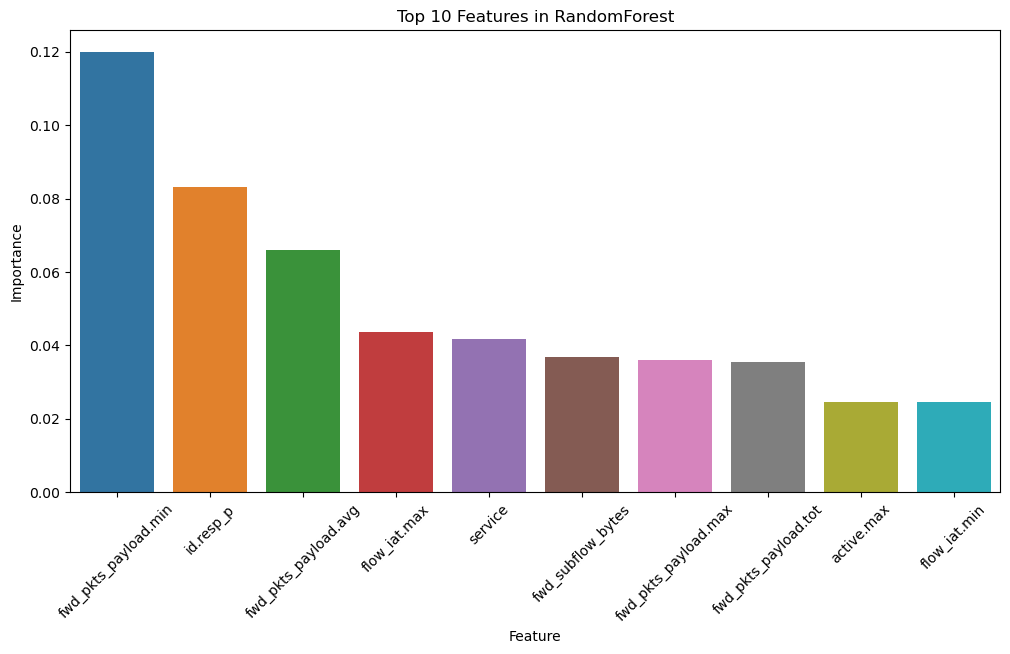

In [7]:
top_ten = feat_df.iloc[0:10,]
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y='Importance', data = top_ten)
plt.title('Top 10 Features in RandomForest')
plt.xticks(rotation=45);

In [8]:
# I will use Gradient Boosting Machine to get feature importance as well
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_model = xgb_clf.fit(X,y)
xgb_import = xgb_model.feature_importances_

In [9]:
#combine feature importances into a df with column names
xgb_df = pd.DataFrame(xgb_import, X.columns).reset_index()
xgb_df.columns = ['Feature','Importance']
#sort in descending order to find most importance features
xgb_df = xgb_df.sort_values('Importance', ascending = False)
xgb_df.head(10)

,Feature,Importance
25,fwd_URG_flag_count,0.177513
38,bwd_pkts_payload.std,0.133505
37,bwd_pkts_payload.avg,0.083039
2,proto,0.078441
29,fwd_pkts_payload.min,0.073828
22,fwd_PSH_flag_count,0.062612
70,active.min,0.055012
13,fwd_header_size_tot,0.045605
3,service,0.035177
14,fwd_header_size_min,0.026744


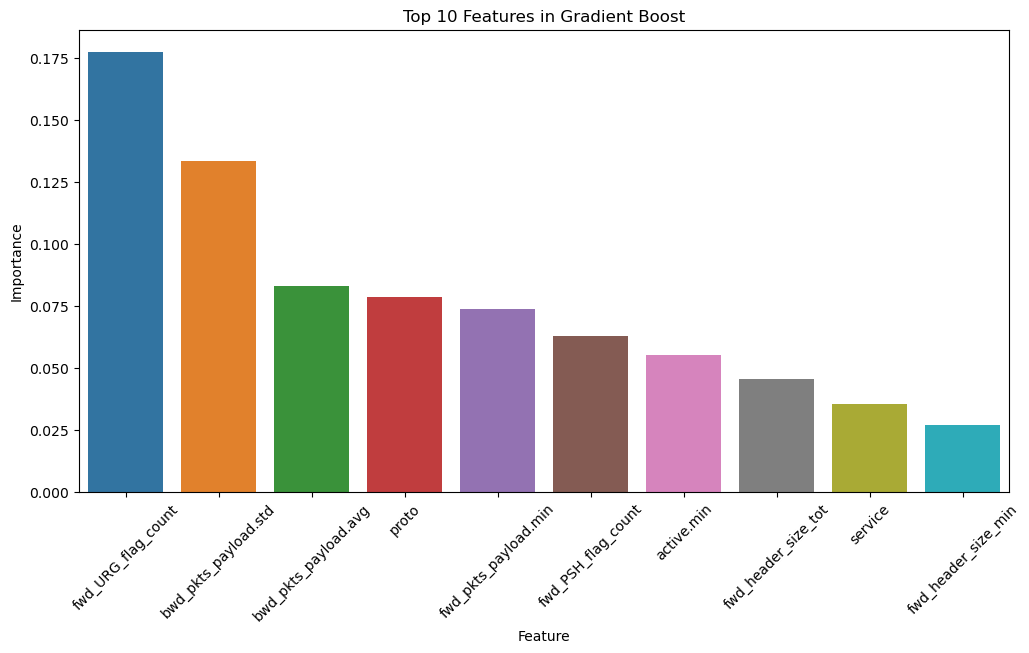

In [10]:
top_ten_xgb = xgb_df.iloc[0:10,]
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y='Importance', data = top_ten_xgb)
plt.title('Top 10 Features in Gradient Boost')
plt.xticks(rotation=45);

Gradient Boost method has found different importances with higher values. The most important feature being fwd_URG_flag_count with 0.18 importance, followed by bwd_pkts_payload.std with 0.13 importance. In the report I will detail the differences and why it occurred with references.

### Question 4

#### Model 1  
For model 1 I will build a SGD Classifier model.

In [11]:
# split into training and test sets 70/30 split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state = 42)

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
#model 1 will use loss = hinge and alpha = 0.0001 (default values)
sgd = SGDClassifier(loss='hinge', alpha = 0.0001,random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.856
Train Accuracy of model 1 is: 0.853


In [13]:
#change alpha to 0.001
sgd = SGDClassifier(loss='hinge', alpha = 0.001,random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.854
Train Accuracy of model 1 is: 0.851


In [14]:
#change alpha to 0.01
sgd = SGDClassifier(loss='hinge', alpha = 0.01,random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.855
Train Accuracy of model 1 is: 0.853


In [15]:
#change loss to squared_hinge
sgd = SGDClassifier(loss='squared_hinge', alpha = 0.001, random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.834
Train Accuracy of model 1 is: 0.83


In [16]:
#change alpha to 0.01
sgd = SGDClassifier(loss='squared_hinge', alpha = 0.01, random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.821
Train Accuracy of model 1 is: 0.816


In [17]:
#change loss to modified_huber
sgd = SGDClassifier(loss='modified_huber', alpha = 0.001, random_state=42)
model1 = sgd.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.818
Train Accuracy of model 1 is: 0.815


Performing hyperparameter tuning has not improved accuracy for SGD.

### Model 2  
For model 2 I will build a logistic regression

In [18]:
#use default settings first
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=42)

model2 = logr.fit(Xtrain, ytrain)

pred1 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 2 is: {round(acc1,3)}')
print(f'Train Accuracy of model 2 is: {round(acc2,3)}')

Test Accuracy of model 2 is: 0.808
Train Accuracy of model 2 is: 0.807


In [19]:
# change C to 0.1, default is 1
logr = LogisticRegression(C=0.1, random_state=42)

model2 = logr.fit(Xtrain, ytrain)

pred1 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 2 is: {round(acc1,3)}')
print(f'Train Accuracy of model 2 is: {round(acc2,3)}')

Test Accuracy of model 2 is: 0.804
Train Accuracy of model 2 is: 0.803


In [20]:
# change multi_class to ovr
logr = LogisticRegression(multi_class = 'ovr', random_state=42)

model2 = logr.fit(Xtrain, ytrain)

pred1 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 2 is: {round(acc1,3)}')
print(f'Train Accuracy of model 2 is: {round(acc2,3)}')

Test Accuracy of model 2 is: 0.919
Train Accuracy of model 2 is: 0.917


In [21]:
# use multi_class to ovr and change C to 0.1
logr = LogisticRegression(multi_class = 'ovr', C = 0.1, random_state=42)

model2 = logr.fit(Xtrain, ytrain)

pred1 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 2 is: {round(acc1,3)}')
print(f'Train Accuracy of model 2 is: {round(acc2,3)}')

Test Accuracy of model 2 is: 0.919
Train Accuracy of model 2 is: 0.917


Hyperparameter tuning took original model from 0.808 to 0.919 accuracy.

### Model 3  
For model 3 I will use MLP

In [22]:
#use default settings for mlp
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.915
Train Accuracy of model 3 is: 0.917


In [23]:
# change activation to logisitc (relu is default)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'logistic',random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.937
Train Accuracy of model 3 is: 0.936


In [24]:
# try tanh
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh',random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.954
Train Accuracy of model 3 is: 0.953


In [25]:
# try identity
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'identity',random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.935
Train Accuracy of model 3 is: 0.933


In [26]:
# use tanh and change solver to sgd (default is adam)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh', solver='sgd',random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.937
Train Accuracy of model 3 is: 0.936


In [27]:
# use tanh and change solver to lbfgs
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh', solver='lbfgs',random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.894
Train Accuracy of model 3 is: 0.894


In [28]:
#use tanh and default driver, adjust hidden layers to 50 (default is 100)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes=50,random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.934
Train Accuracy of model 3 is: 0.932


In [29]:
#use tanh and default driver, adjust hidden layers to 200 (default is 100)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes=200,random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.944
Train Accuracy of model 3 is: 0.943


In [30]:
#use tanh and default driver, hidden layers = 200 and alpha =0.01 (default is 0.0001)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes=200, alpha = 0.01,random_state=42)
model3 = mlp.fit(Xtrain, ytrain)

pred1 = model3.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model3.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 3 is: {round(acc1,3)}')
print(f'Train Accuracy of model 3 is: {round(acc2,3)}')


Test Accuracy of model 3 is: 0.947
Train Accuracy of model 3 is: 0.944


Hyperparameter tuning was able to increase accuracy from 0.914 to 0.953

### Question 5  
### Model 1
For model 1 of ensemble models I will build a Random Forest

In [31]:
#Do default random forest
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(random_state=42)
model1 = rclf.fit(Xtrain, ytrain)

pred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 1 is: {round(acc1,3)}')
print(f'Train Accuracy of model 1 is: {round(acc2,3)}')

Test Accuracy of model 1 is: 0.998
Train Accuracy of model 1 is: 1.0


Near perfect accuracy, no hyperparameter tuning will be done.

### Model 2  
For model 2 I will use Bagging Classifier 

In [32]:
#do default gradient boost
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=42)
model2 = bc.fit(Xtrain, ytrain)

pred1 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = model2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of model 2 is: {round(acc1,3)}')
print(f'Train Accuracy of model 2 is: {round(acc2,3)}')

Test Accuracy of model 2 is: 0.998
Train Accuracy of model 2 is: 1.0


Just as accurate as Random Forest, will move on.

### Model 3  
For model 3 we use the vote classifier

In [33]:
#perform voting classifier for 3 best classifier built so far
# Randomforest, bagging and mlp
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(activation = 'tanh', hidden_layer_sizes=200, random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = BaggingClassifier(random_state=42)

#use hard voting
eclf1 = VotingClassifier(estimators = [('MLP',clf1),('RF',clf2),('BC',clf3)],voting='hard')
eclf1 = eclf1.fit(Xtrain,ytrain)

pred1 = eclf1.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = eclf1.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of hard voting is: {round(acc1,3)}')
print(f'Train Accuracy of hard voting is: {round(acc2,3)}')

Test Accuracy of hard voting is: 0.998
Train Accuracy of hard voting is: 1.0


In [34]:
#use soft voting
eclf2 = VotingClassifier(estimators = [('MLP',clf1),('RF',clf2),('BC',clf3)],voting='soft')
eclf2 = eclf2.fit(Xtrain,ytrain)

pred1 = eclf2.predict(Xtest)
acc1 = accuracy_score(ytest, pred1)
pred2 = eclf2.predict(Xtrain)
acc2 = accuracy_score(ytrain, pred2)

print(f'Test Accuracy of soft voting is: {round(acc1,3)}')
print(f'Train Accuracy of soft voting is: {round(acc2,3)}')

Test Accuracy of soft voting is: 0.998
Train Accuracy of soft voting is: 1.0
